In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import stats
from numpy import concatenate
from numpy.random import shuffle

In [3]:
# Create two Normal distributions over a range of x values
mu1, mu2 = 85, 90
sd1, sd2 = 6, 6
x = np.linspace(50,100,100)
norms = (normpdf(x, mu1, sd1), normpdf(x, mu2, sd2))

In [4]:
# Set false negative and false positive rates
fnr = 0.3
fpr = 0.1

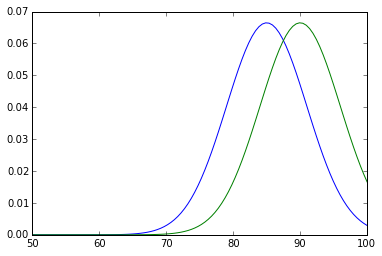

In [5]:
# Plot normal distributions
plot(x, norms[0])
plot(x, norms[1])

In [6]:
# Subsample each distribution and plot the subsample
n1, n2 = 40, 15
samples = (clip(stats.norm.rvs(mu1, sd1, size=n1), 0, 100),
           clip(stats.norm.rvs(mu2, sd2, size=n2), 0, 100))

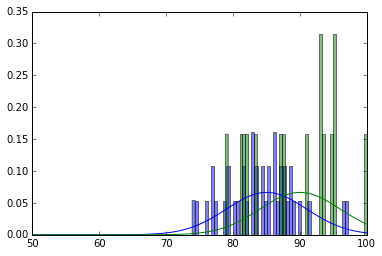

In [7]:
# Plot reference distributions and subsamples
# Plot normal distributions
plot(x, norms[0])
plot(x, norms[1])
# Plot samples
num_bins = 50
k, bins1, patches1 = plt.hist(samples[0], num_bins, normed=1, facecolor='blue', alpha=0.5)
k, bins1, patches1 = plt.hist(samples[1], num_bins, normed=1, facecolor='green', alpha=0.5)

In [8]:
# Do a t-test on our samples
stats.ttest_ind(samples[0], samples[1], equal_var = False)

(-2.7359467744180082, 0.012260532463655389)

In [9]:
# Adjust our samples by the false negative rate
# norms[0] is the distribution for real negative examples
# samples[0] is the sampled distribution for real negative examples
# norms[1] is the distribution for real positive examples
# samples[1] is the sampled distribution for real positive examples
# We create obs_neg and obs_pos to hold our 'observed' classes
[shuffle(s) for s in samples]
obs_neg = concatenate((samples[0], samples[1][int((1-fnr)*n2):]))
obs_pos = samples[1][:int((1-fnr)*n2)]

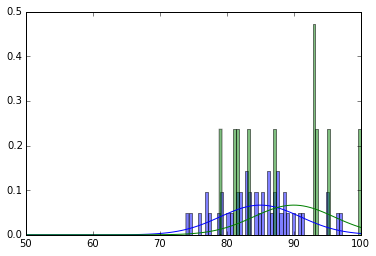

In [10]:
# Plot reference distributions and observed samples
# Plot normal distributions
plot(x, norms[0])
plot(x, norms[1])
# Plot samples
num_bins = 50
k, bins1, patches1 = plt.hist(obs_neg, num_bins, normed=1, facecolor='blue', alpha=0.5)
k, bins1, patches1 = plt.hist(obs_pos, num_bins, normed=1, facecolor='green', alpha=0.5)

In [11]:
# Do a t-test on our observations
stats.ttest_ind(obs_neg, obs_pos, equal_var = False)

(-1.6323771663263467, 0.12952540668134829)

In [12]:
# Adjust our samples by the false negative and false positive rates
# norms[0] is the distribution for real negative examples
# samples[0] is the sampled distribution for real negative examples
# norms[1] is the distribution for real positive examples
# samples[1] is the sampled distribution for real positive examples
# We create obs_neg and obs_pos to hold our 'observed' classes
[shuffle(s) for s in samples]
obs_neg = concatenate((samples[0][:int((1-fpr)*n1)], 
                       samples[1][int((1-fnr)*n2):]))
obs_pos = concatenate((samples[1][:int((1-fnr)*n2)],
                       samples[0][int((1-fpr)*n1):]))

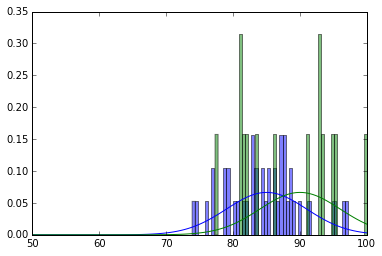

In [13]:
# Plot reference distributions and observed samples
# Plot normal distributions
plot(x, norms[0])
plot(x, norms[1])
# Plot samples
num_bins = 50
k, bins1, patches1 = plt.hist(obs_neg, num_bins, normed=1, facecolor='blue', alpha=0.5)
k, bins1, patches1 = plt.hist(obs_pos, num_bins, normed=1, facecolor='green', alpha=0.5)

In [14]:
# Do a t-test on our observations
stats.ttest_ind(obs_neg, obs_pos, equal_var = False)

(-1.7278892528236778, 0.10047309635837838)

In [15]:
obs_neg.mean(), obs_pos.mean()

(84.570717851909706, 88.119875772460986)

In [16]:
obs_neg.std(), obs_pos.std()

(5.393638717684329, 6.7374692136875263)